# A full example 

This notebook uses the Qiskit's RealAmplitudes circuit as an example of the framework.

The circuit is trained & scored. Descriptors are calculated.

### Imports

In [1]:
#Thesis libs
from JQCLib.Utils.Trainer import Train
from JQCLib.Classes.QCSamplerClass import QCSampler
from JQCLib.Preprocessing.Utils import ToQiskit
from JQCLib.Metrics.QiskitMetrics import HilbertSchmidtNorm, MeyerWallach
from JQCLib.Metrics.DKLFPMetrics import DKL

#Other libs
import numpy as np
from qiskit.circuit.library import RealAmplitudes

### Create and display RealAmplitudes circuit using Qiskit & Custom notation

Using Qiskit: (Number of layers: 12)


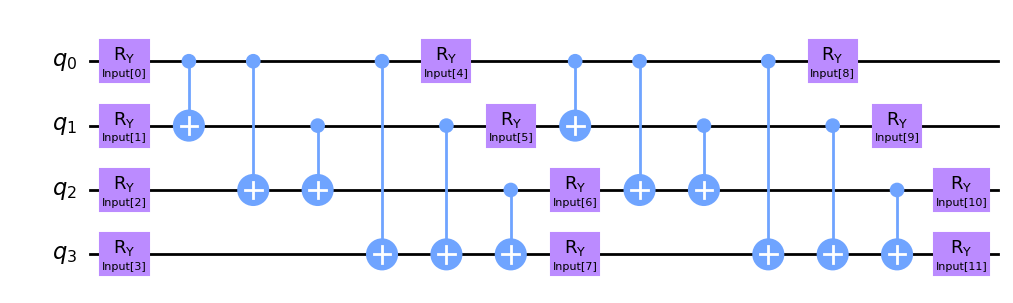

Using custom (thesis) notation:


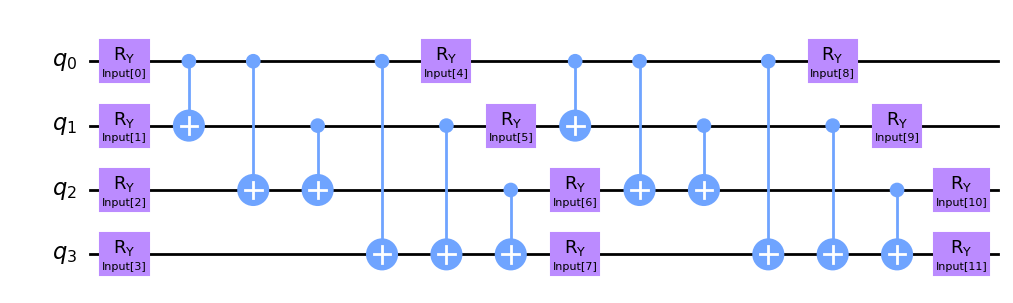

In [2]:
qiskitRA = RealAmplitudes(4, entanglement='full', reps=2, parameter_prefix='Input').decompose()
print(f"Using Qiskit: (Number of layers: {qiskitRA.depth()})")
display(qiskitRA.draw('mpl'))

print(f"Using custom (thesis) notation:")

customnotation = np.array([
    [3,5,6,0,7,3,0,5,6,0,7,3,0,0],
    [3,0,0,6,0,7,3,0,0,6,0,7,3,0],
    [3,0,0,0,0,0,7,3,0,0,0,0,7,3],
    [3,0,0,0,0,0,0,3,0,0,0,0,0,3]
 ],dtype=int)

qiskitRA_JM = ToQiskit(customnotation,insert_barriers=False)
display(qiskitRA_JM.draw('mpl'))

## Train RealAmplitudes circuit

Executiontime:  3153.734099626541
Accuracy:       0.8
CrossEntropy:   0.6254008412886098


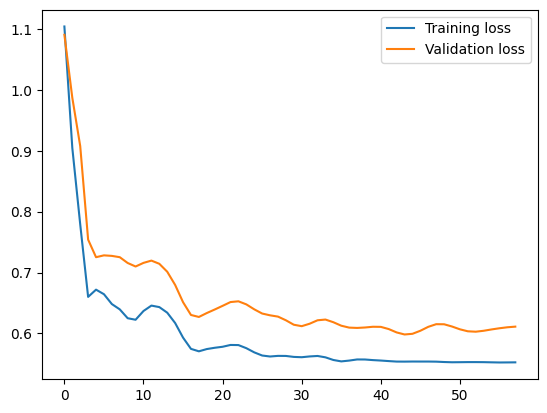

In [3]:
trainResult = Train(customnotation)

print(f"Executiontime:  {trainResult.Executiontime}")
print(f"Accuracy:       {trainResult.Accuracy}")
print(f"CrossEntropy:   {trainResult.CrossEntropy}")

trainResult.plot()

### Calculate descriptors for RealAmplitudes circuit

In [4]:
#Let's use 1k bins and sample 5k state pairs
BINS =      1000
SAMPLES =   5000

#For HilbertSchmidtNorm & MeyerWallach we wrap the circuit in the Qiskit-aware class: QCSampler
qc = QCSampler(customnotation)

print("Hilbert-Schmidt Norm        :",HilbertSchmidtNorm(qc, SAMPLES))
print("Meyer-Wallach Entanglement  :",MeyerWallach(qc, SAMPLES))
print("Kullback–Leibler divergence :",DKL(customnotation,BINS,SAMPLES))

Hilbert-Schmidt Norm        : 0.019513216261721488
Meyer-Wallach Entanglement  : 0.7791254847160233
Kullback–Leibler divergence : 0.29798759805185665
